<a href="https://colab.research.google.com/github/singh-shalini/brain-tumor-detection/blob/main/Brain_Tumor_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Dataset Using Kaggle API

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import shutil, os
os.makedirs("/root/.kaggle", exist_ok=True)

In [ ]:
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

'/root/.kaggle/kaggle.json'

In [ ]:
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
import json
with open("/root/.kaggle/kaggle.json", "r") as f:
    creds = json.load(f)
    print("Kaggle Username:", creds["username"])

Kaggle Username: shalinisingh15


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 78% 116M/149M [00:00<00:00, 605MB/s] 
100% 149M/149M [00:00<00:00, 509MB/s]


In [ ]:
!unzip -q brain-tumor-mri-dataset.zip -d brain_tumor_dataset

In [ ]:
import os
print(os.listdir("brain_tumor_dataset/Testing"))

['notumor', 'glioma', 'pituitary', 'meningioma']


In [ ]:
train_dir = '/content/brain_tumor_dataset/Training'
test_dir = '/content/brain_tumor_dataset/Testing'

# Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1] and augment training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Test data should only be rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


#Training the Dataset

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 base without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert 3D feature maps to 1D
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5998 - loss: 1.0398

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.6005 - loss: 1.0381 - val_accuracy: 0.7613 - val_loss: 0.6219
Epoch 2/3
179/179 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.8599 - loss: 0.4191 - val_accuracy: 0.8131 - val_loss: 0.4950
Epoch 3/3
179/179 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.8912 - loss: 0.3256 - val_accuracy: 0.8513 - val_loss: 0.4074


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8320 - loss: 0.4359
Test Accuracy: 85.13%


#Evaluation

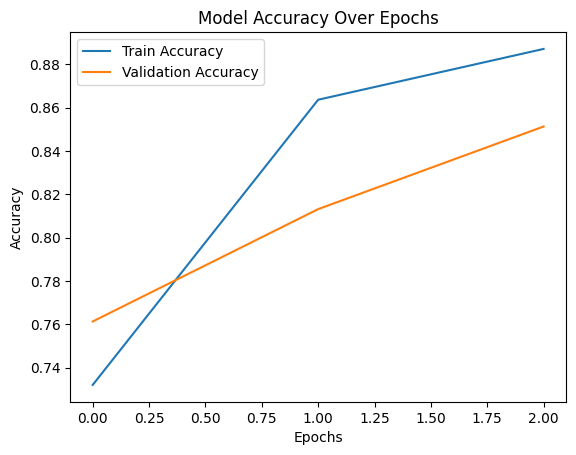

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [ ]:
model.save("brain_tumor_model.h5")

In [ ]:
from google.colab import files
files.download("brain_tumor_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#The Interface

In [ ]:
# Install packages
!pip install gradio reportlab tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00


In [ ]:
#Load model
from tensorflow.keras.models import load_model
model = load_model("brain_tumor_model.h5")

In [ ]:
#Define class labels
class_labels = ['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']

In [ ]:
educational_content = """

## What is a Brain Tumor?
A brain tumor is an abnormal mass of tissue formed by an uncontrolled division of cells in the brain. These tumors can arise from brain tissue itself or from other structures such as the meninges (protective layers of the brain), cranial nerves, or even from metastatic spread of cancer from other parts of the body.

Brain tumors can affect brain function by:

Compressing or invading healthy brain tissue

Increasing pressure inside the skull (intracranial pressure)

Interrupting blood or cerebrospinal fluid flow

## 🧬Classification of Brain Tumors
Brain tumors are broadly categorized based on their behavior and cell of origin.

### 1. Based on Nature

🔹 Benign Tumors: Non-cancerous, Slow-growing, Well-defined borders,Usually do not invade surrounding tissue,
May still be dangerous if located in critical areas

🔹 Malignant Tumors: Cancerous, Grow rapidly, Can infiltrate nearby brain tissue, Often recur after treatment

### 2. Based on Origin

🔸 Primary Tumors: Originate in the brain or surrounding tissues

Common types:

Gliomas (arising from glial cells)

Meningiomas (from meninges)

Pituitary adenomas (pituitary gland)

Medulloblastomas (cerebellum, mostly in children)

🔸 Secondary (Metastatic) Tumors: Originate elsewhere in the body (e.g., lung, breast)

Spread to the brain via bloodstream

More common than primary tumors in adults

## 🔬 Common Types of Brain Tumors

### 1. Gliomas
Arise from glial cells (supportive tissue of the brain)

Subtypes: Astrocytomas, Oligodendrogliomas, Ependymomas, Can be low-grade (slow-growing) or high-grade (aggressive)

### 2. Meningiomas
Arise from the meninges
Usually benign but can cause problems due to size and pressure
More common in women

### 3. Pituitary Adenomas
Arise from the pituitary gland
Can affect hormone production (causing hormonal imbalances)
Often benign

### 4. Medulloblastomas
Highly malignant
Occur in the cerebellum (balance & coordination center)
Primarily affect children

### 5. Schwannomas
Affect cranial nerves, especially the vestibulocochlear nerve (balance/hearing)
Example: Acoustic neuroma

## ⚠️ Symptoms of Brain Tumors

1. Symptoms depend on tumor size, type, and location, but may include:

2. Persistent headaches, especially worse in the morning

3. Seizures (new or changing pattern)

4. Nausea and vomiting

5. Blurred or double vision

6. Balance and coordination problems

7. Personality changes or cognitive decline

8. Drowsiness or lethargy


## 🧪Diagnosis

Diagnosis typically involves:

1. Neurological Examination

2. Reflexes, eye movement, coordination, strength

3. Imaging

4. MRI (Magnetic Resonance Imaging) – gold standard

5. CT scan if MRI is not feasible

6. Biopsy

7. Surgical removal of a small part of the tumor for histological analysis

8. Molecular Testing


## 💊 Treatment Options

Treatment depends on tumor type, grade, size, and location:

1. Surgery: Often the first step if the tumor is operable,Complete removal or debulking to relieve pressure

2. Radiation Therapy: High-energy beams to kill or shrink tumor cells, often used post-surgery

3. Chemotherapy: Drugs to destroy cancer cells, Limited effectiveness due to the blood-brain barrier

4. Targeted Therapy: Drugs that target specific genes or proteins in tumor cells

5. Immunotherapy (emerging): Boosts the immune system to fight cancer
"""

# PDF generation with Name & ID
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import datetime

def generate_pdf_report(name, patient_id, result_label, report_text):
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"BrainTumorReport_{timestamp}.pdf"
    filepath = f"/content/{filename}"

    c = canvas.Canvas(filepath, pagesize=letter)
    width, height = letter
    c.setFont("Helvetica", 12)

    y = height - 50
    c.drawString(50, y, "Brain Tumor Detection Report")
    y -= 30
    c.drawString(50, y, f"Patient Name: {name}")
    y -= 20
    c.drawString(50, y, f"Patient ID: {patient_id}")
    y -= 20
    c.drawString(50, y, f"Result: {result_label}")
    y -= 20
    c.drawString(50, y, "Date: " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    y -= 40

    for line in report_text.split('\n'):
        if y < 100:
            c.showPage()
            y = height - 50
            c.setFont("Helvetica", 12)
        c.drawString(50, y, line.strip())
        y -= 20

    c.save()
    return filepath

Prediction and PDF Logic

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_and_predict(img_path, name, patient_id):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    class_index = np.argmax(prediction)
    predicted_label = class_labels[class_index]
    confidence = round(prediction[class_index] * 100, 2)

    if predicted_label == 'No Tumor':
        report = f"""
✅ NO TUMOR DETECTED
Confidence: {confidence}%

Brain Health Tips:
- Sleep 7–8 hrs
- Reduce screen time
- Exercise & meditate
- Eat omega-3 rich foods

NOTE: This is not a substitute for medical diagnosis.
"""
    else:
        report = f"""
⚠️TUMOR DETECTED: {predicted_label}
Confidence: {confidence}%

Suggested Steps:
- Consult a neurologist
- MRI, biopsy, further tests
- Surgery/chemo/radiation as advised

NOTE: Seek professional medical attention immediately.
"""

    result_summary = f"{predicted_label} ({confidence}%)"
    pdf_path = generate_pdf_report(name, patient_id, result_summary, report)
    return result_summary, report, pdf_path


In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# 🧠 Brain Tumor Detection & Awareness Portal")

    with gr.Tab("📚 Learn About Brain Tumors"):
        gr.Markdown(educational_content)

    with gr.Tab("🔍 Upload MRI and Detect Tumor"):
        name_input = gr.Textbox(label="Patient Name")
        id_input = gr.Textbox(label="Patient ID")
        image_input = gr.Image(type="filepath", label="Upload Brain MRI Image")
        predict_button = gr.Button("Analyze MRI")
        result = gr.Label()
        report = gr.Textbox(lines=10, label="Detailed Report")
        pdf_output = gr.File(label="Download PDF Report")

        predict_button.click(
            fn=preprocess_and_predict,
            inputs=[image_input, name_input, id_input],
            outputs=[result, report, pdf_output]
        )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://157ef0e12931de7a8f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface = gr.Interface(
    fn=predict_mri,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=4),
    title="Brain Tumor Detection from MRI",
    description="Upload an MRI scan to detect the presence and type of brain tumor.",
    theme="default"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cc2503a298e53a9a7e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio tensorflow pillow opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import load_model # Import the necessary function

model = load_model('brain_tumor_model.h5') # Select your 'brain_tumor_model.h5'

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model("brain_tumor_model.h5")

# Class names (order depends on your training generator)
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Prediction function
def predict_tumor(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)[0]
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    return f"{predicted_class} ({confidence * 100:.2f}%)"
